# Python：二项分布、泊松分布、正态分布 关系

## Python之二项分布、泊松分布

以医院在一天内将会有多少婴儿出生的问题（这个问题就服从泊松分布）为例来看：

我们可以将这一天的时间采用极限的思想，无限细分成n个小的时间段，每一个小的时间段内，是不是只有两种结果出现：婴儿出生和婴儿不出生，是不是这样一个小的时间段我们就可以看做是一个一次随机试验，试验的结果只有两个出生和不出生，这样n个小的时间段是不是就可以看做是一个n重伯努利试验，用分布来描述：就是一个二项分布，泊松分布是不是就转换成了一个二项分布呢？所以简单来讲，在n很大，p很小的情况下，二项分布就是泊松分布，泊松分布就是二项分布，当然也就可以近似替代了。

接下来，我们通过计算机来实现这种结果的模拟。

注：一般当n>=20,p<=0.05的时候，就可以用泊松分布近似替代二项分布了。


### 当n为10，p=0.5时，根据上边条件，我们得知：二项分布应该不能使用泊松分布近似替代，

下图显示，n为10，p=0.5时，二项分布和泊松分布也明显不同

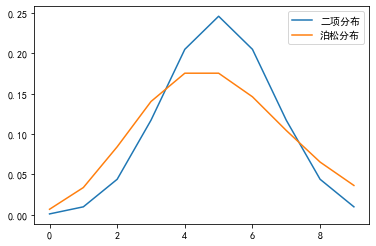

In [1]:
# 导入相应库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['font.sans-serif']=['SimHei']
# 绘制二项分布和泊松分布图
n = 10
p=0.5
q=1-p
bino = stats.binom(n,p)
x = np.arange(0,n)
y1 = bino.pmf(x)
possion = stats.poisson(n*p)
y2 = possion.pmf(x)
plt.plot(x,y1,label="二项分布")
plt.plot(x,y2,label="泊松分布")
plt.legend()
plt.show()

### 当n为100，p=0.05时，根据上边条件，我们得知：二项分布应该可以使用泊松分布近似替代，

下图显示，n为100，p=0.05时，二项分布和泊松分布就非常近似了

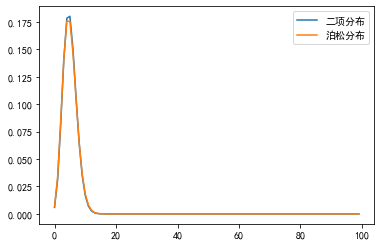

In [4]:
# 导入相应库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# 绘制二项分布图和泊松分布图
n = 100
p=0.05
q=1-p
bino = stats.binom(n,p)
x = np.arange(0,n)
y1 = bino.pmf(x)
possion = stats.poisson(n*p)
y2 = possion.pmf(x)
plt.plot(x,y1,label="二项分布")
plt.plot(x,y2,label="泊松分布")
plt.legend()
plt.show()

## Python之二项分布、正态分布

咱们讲解一下二项分布转换正态分布求解的条件，通过python来看一下，为什么二项分布在某种条件下是可以转换成正态分布近似求解

### 二项分布
n重伯努利实验中，事件A出现的次数对应分布就是二项分布，即：随机变量X的分布列为：

其中，0<p<1,q=1-p,当n=1时，二项分布就是两点分布

二项分布的期望等于：np，方差等于npq

### 正态分布
正态分布（Normal distribution），又名高斯分布，如果随机变量X的概率密度函数可以写成如下形式：

我们称该随机变量服从正态分布，μ代表均值，σ^2代表方差，当μ=0，σ^2=1时，又叫做标准正态分布

#### 我们用python绘制一个漂亮的正态分布图

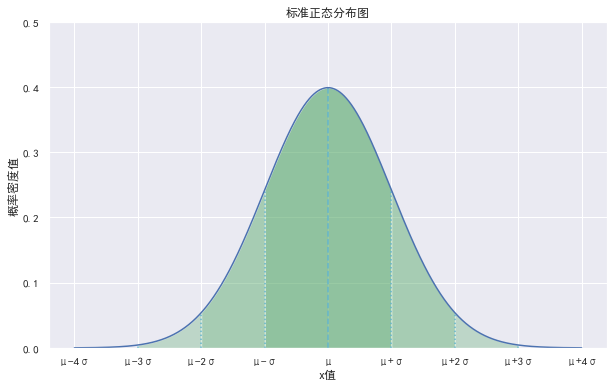

In [3]:
#导入相应的包
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats

# 设置seaborn绘图的样式
sns.set(style="darkgrid")
# 设置字体格式
plt.rcParams["font.family"] = "SimHei" 
# 控制字符可以正常显示
plt.rcParams["axes.unicode_minus"] = False 

# 人为构造一个正态分布
# linspace函数：在指定的间隔内返回间隔均匀的数字
x = np.linspace(-4,4,10000)
# 设置均值和标准差
mu = 0
sigma = 1

# 进行图形绘制
plt.figure(figsize=(10,6))
plt.title("标准正态分布图")
plt.xlabel("x值")
plt.ylabel("概率密度值")
plt.ylim(0,0.5)
plt.plot(x,stats.norm.pdf(x,mu,sigma))


# 设置图形垂直线
plt.vlines(mu,0,stats.norm.pdf(0,mu,sigma),colors = "c",linestyles = "dashed")
plt.vlines(-1,0,stats.norm.pdf(-1,mu,sigma),colors = "c",linestyles = "dotted")
plt.vlines(1,0,stats.norm.pdf(1,mu,sigma),colors = "c",linestyles = "dotted")
plt.vlines(-2,0,stats.norm.pdf(-2,mu,sigma),colors = "c",linestyles = "dotted")
plt.vlines(2,0,stats.norm.pdf(2,mu,sigma),colors = "c",linestyles = "dotted")
plt.vlines(3,0,stats.norm.pdf(3,mu,sigma),colors = "c",linestyles = "dotted")
plt.vlines(-3,0,stats.norm.pdf(3,mu,sigma),colors = "c",linestyles = "dotted")
plt.xticks (np.arange(-4, 5),['μ-4σ','μ-3σ','μ-2σ','μ-σ','μ','μ+σ','μ+2σ','μ+3σ','μ+4σ'])

# 设置不同区间的颜色显示
# 设置【-1,1】区间
x = list(np.linspace(-1,1,10000))
y1 = stats.norm.pdf(x,mu,sigma)
plt.fill_between(x,y1,y2=0,facecolor="g",alpha=0.6)
# 设置【-2，-1】和【1,2】区间
x1 = list(np.linspace(-2,-1,10000))
x2 = list(np.linspace(1,2,10000))
y1 = stats.norm.pdf(x1,mu,sigma)
y2 = stats.norm.pdf(x2,mu,sigma)
plt.fill_between(x1,y1,facecolor="g",alpha=0.45)
plt.fill_between(x2,y2,facecolor="g",alpha=0.45)
# 设置【-3，-2】和【2,3】区间
x1 = list(np.linspace(-3,-2,10000))
x2 = list(np.linspace(2,3,10000))
y1 = stats.norm.pdf(x1,mu,sigma)
y2 = stats.norm.pdf(x2,mu,sigma)
plt.fill_between(x1,y1,facecolor="g",alpha=0.3)
plt.fill_between(x2,y2,facecolor="g",alpha=0.3)

#### 二项分布和正态分布的转换

上面，我们讲到，当n>=20，p<=0.05的时候,就可以用泊松分布近似替代二项分布了,如果n再大一些，即：np>5且nq>5，二项分布就近似服从均值为np，方差npq的正态分布，二项分布问题就转换成了正态分布问题。

另外，我们在用正态分布近似计算二项分布概率值时，需要做连续性修正，连续性修正是指：连续型分布的每个测量区间上下各延伸0.5，举例如下：

在计算二项分布随机变量8<=x<=10区间的概率时，做完连续性修正后，我们应该在正态分布中计算7.5<=x<=10.5区间的概率以近似求解二项分布中x=8,9,10的概率，这就是连续性修正。为什么需要进行连续性修正呢？主要是为了减少误差

#### python实现

当取n=100，p=0.147时，我们分别绘制二项分布图和正态分布图形如下（深色柱形图代表二项分布，浅色曲线代表正态分布）：

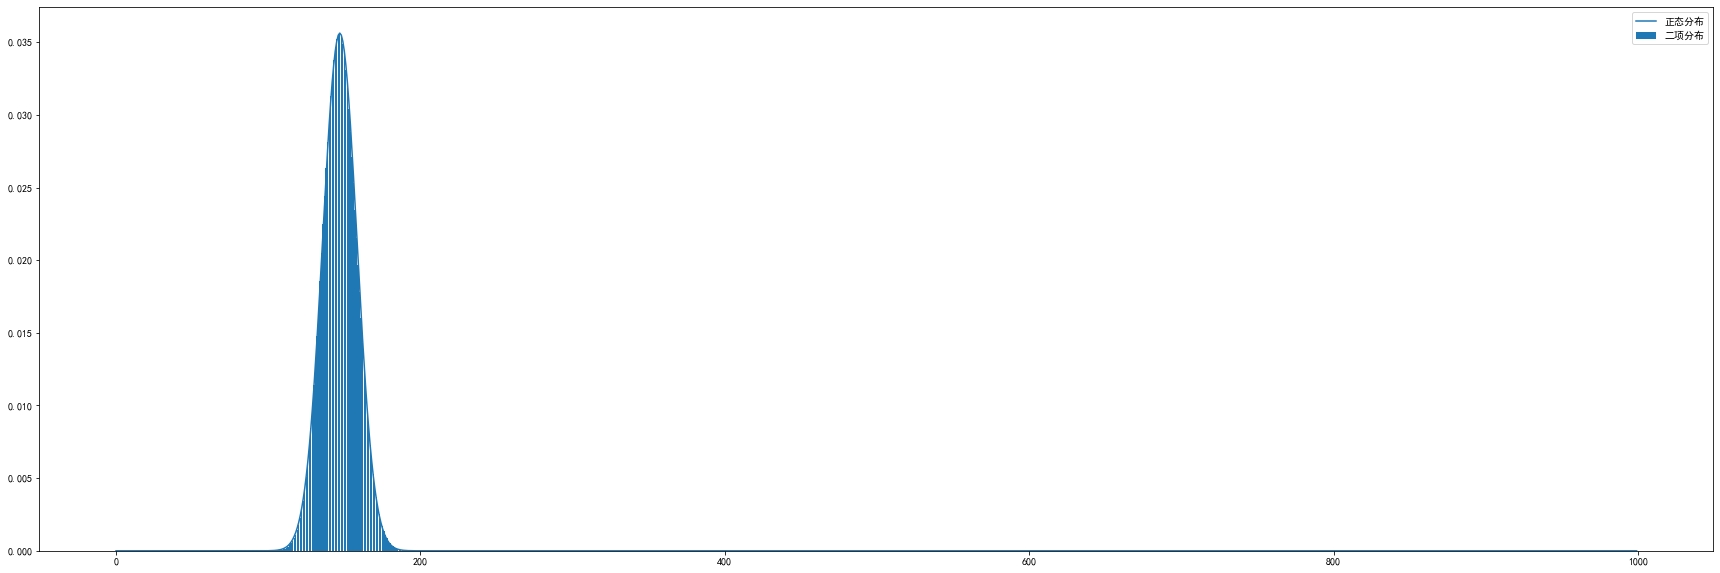

In [5]:
#导入相应的包
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats
# 绘制二项分布图和正态分布图
n = 1000
p=0.147
q=1-p
bino = stats.binom(n,p)
x = np.arange(0,n)
y1 = bino.pmf(x)
y2 = stats.norm.pdf(x,n*p,(n*p*q)**0.5)
plt.figure(figsize=(30,10))
plt.bar(x,y1,label="二项分布")
plt.plot(x,y2,label="正态分布")
plt.legend()
plt.show()